# When life hands you Olympic data....

Analyze it! I started with a dataset from KAGGLE containing Olympic data from 1896 through 2016 because I've always been a fan of the Olympic Games and figured it wouldn't be too hard to find a few trends within it.  The dataset had roughly 270,000 entries and 17 different categories. I began with some exploratory data analysis.  The first thing that stood out to me was that there is quite a large gap in ages between the competitors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('athlete_events.csv')
df = pd.DataFrame(data)

#print(df.info())
#print(df.describe())
#print(df.head(25))

/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# get a list of all the unique values in the data set

#names = df['Name'].unique()
#print(len(names))
#print(df.Name.nunique())

#for x in df.columns:
    #a = str(x)
    #s = str(df[x].nunique())
    #print(a + ' = ' + s)

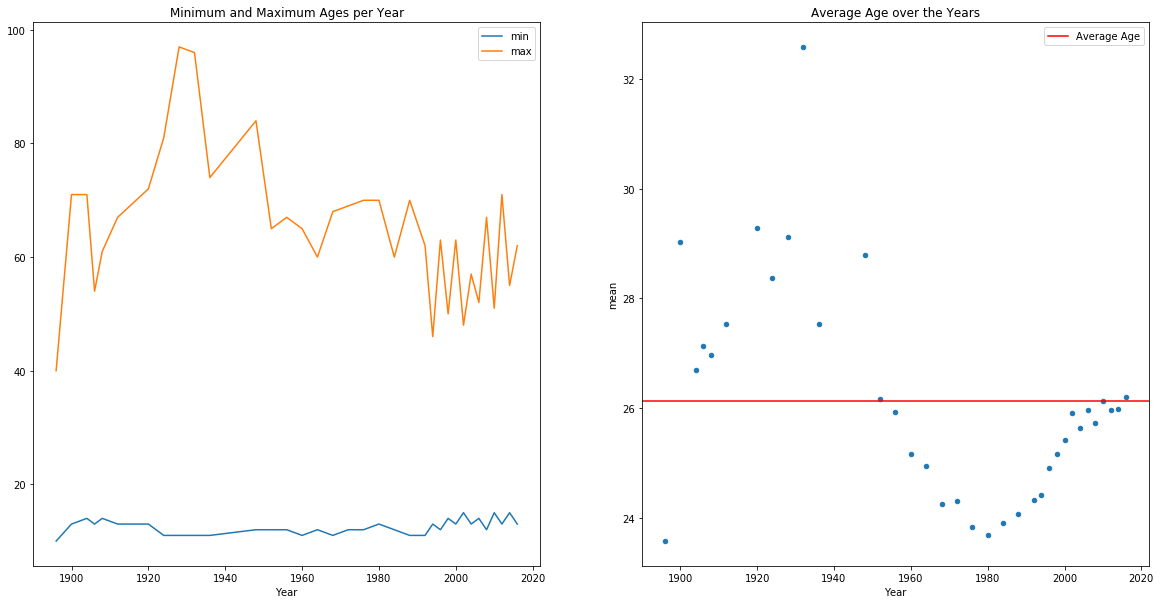

In [3]:
# look at age distribution and where max and min occur

age = df.groupby('Year').agg({'Age':['min','max','mean']})
#print(age)
age.columns = age.columns.droplevel()
age = age.reset_index()
#print(age)
avgage = age['mean'].mean()
age['Delta'] = age['max'] - age['min']
#print(age)
#print(age.max())
#print(age.idxmax())
#print(age.min())
#print(age.idxmin())
#print(age.mean())
youngest_ages = [10, 11, 12, 13, 14, 15]
#find out what countries send the youngest competitors
youngest = df[df['Age'].isin(youngest_ages)]
young1 = youngest['NOC'].unique()
#print(np.sort(young1, axis=None))
#print(len(young1))
#print(df.loc[df['Age'].idxmin()])

#find who was the oldest competitor and what team/event he competed in
oldest = df.loc[df['Age'].idxmax()]
#print(oldest)

#age.hist('mean')
#plt.title('Average Age over the years')
#plt.show()

#age.plot(x='Year', y='Delta', kind='bar')
#plt.show()


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

age.plot(x='Year', y=['min', 'max'], kind='line', title='Minimum and Maximum Ages per Year', ax=ax1)
age.plot(x='Year', y='mean', kind='scatter', title='Average Age over the Years', ax=ax2)
plt.axhline(avgage, xmin=0, xmax=1, color='r', label='Average Age')
plt.legend()

plt.show()

Interestingly, we see that the minimum age is consistantly around 10-15 years old for every olympics.  The youngest competitors came from 157 different countries, with the youngest athlete being **Dimitrios Loundras**, age 10, from Greece.  He competed in the 1896 Summer Games in Athina (Athens) for Greece in *Gymnastics*, specifically the *men's parallel bars*.  **Loundras** was the bronze medal winner in the event.  The maximum age is 97 for athlete **John Quincy Adams Ward**, who competed for **TEAM USA** in *Art Competitions* in the 1928 Summer games in Amsterdam.  One thing to point out is the interesting oscillation in the average ages in competitors over the years that appears to be converging to the average age.  This could be do to the increasing competition and/or the increasing number of competitors.  This can be seen in the following plots. 

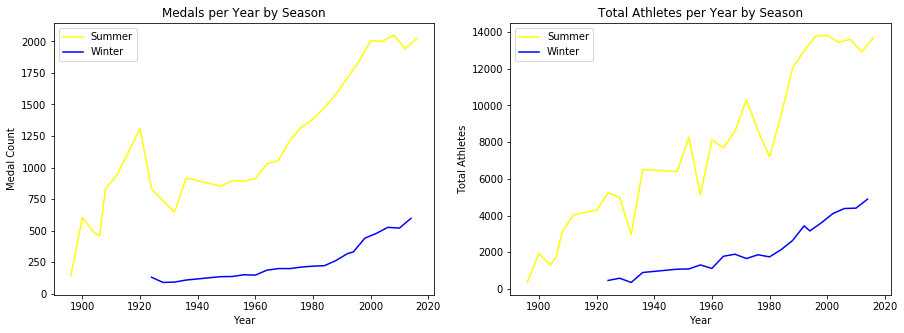

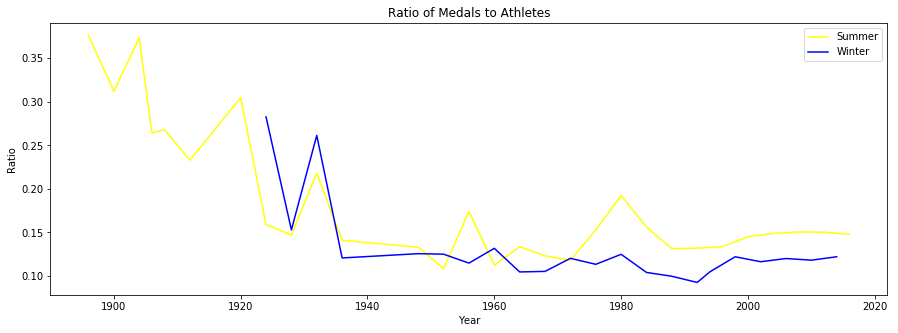

In [4]:
# medals by year separated by season
summer = df[df['Season'] == 'Summer']
winter = df[df['Season'] == 'Winter']
summer_medals_by_year = summer.groupby('Year')['Medal'].count()
winter_medals_by_year = winter.groupby('Year')['Medal'].count()
sum_of_summer_athletes_per_year = summer.groupby('Year')['Name'].count()
sum_of_winter_athletes_per_year = winter.groupby('Year')['Name'].count()
#print(summer_medals_by_year)
#print(winter_medals_by_year)
#print(sum_of_summer_athletes_per_year)
#print(sum_of_winter_athletes_per_year)

#medals per year by season 
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 5))
summer_medals_by_year.plot(kind='line', ax=ax1, color='yellow')
winter_medals_by_year.plot(kind='line', ax=ax1, title='Medals per Year by Season', color='blue')
ax1.set_ylabel('Medal Count')
leg = ax1.legend(['Summer', 'Winter'])

#total athletes per year by sesason
sum_of_summer_athletes_per_year.plot(kind='line', ax=ax2, color='yellow')
sum_of_winter_athletes_per_year.plot(kind='line', ax=ax2, color='blue', title='Total Athletes per Year by Season')
ax2.set_ylabel('Total Athletes')
leg = ax2.legend(['Summer', 'Winter'])
plt.show()

#ratio of medals to athlete per year
fig = plt.figure(figsize=(15,5))
ratio_summer = summer_medals_by_year/sum_of_summer_athletes_per_year
ratio_summer.plot(kind='line', color='yellow')
ratio_winter = winter_medals_by_year/sum_of_winter_athletes_per_year
ratio_winter.plot(kind='line', color='blue', title='Ratio of Medals to Athletes')
plt.ylabel('Ratio')
leg = plt.legend(['Summer', 'Winter'])
plt.show()

We can see that the number of medals won and the number of athletes both increase over the years.  The final plot shows a ratio of the number of medals won divided by the total number of athletes.  This ratio can be considered an expression of the level of competition over time.  We can see that as we approach present day the level of competition increased (i.e. it has become harder to win a medal over time).

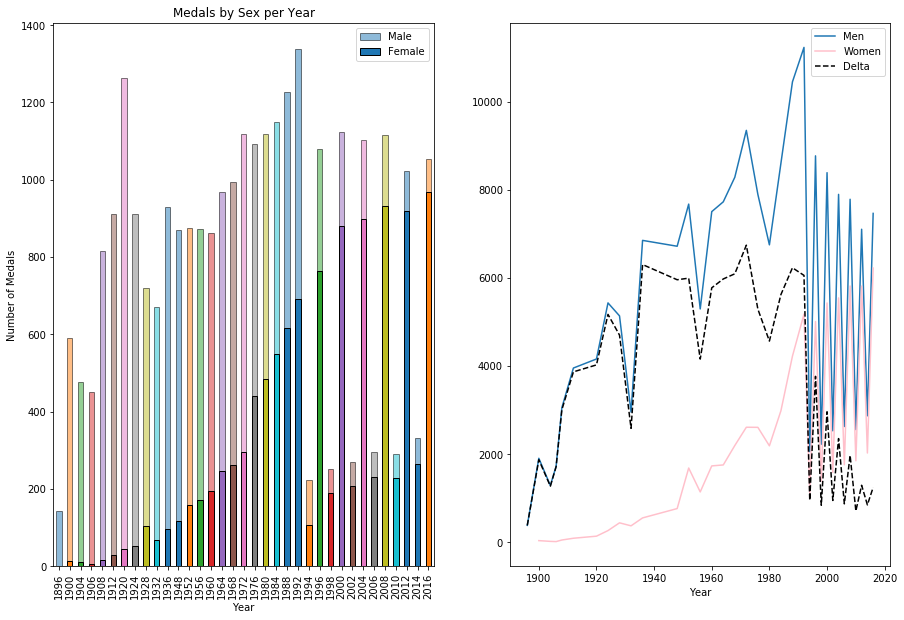

In [5]:
#men vs women medals by year
men = df[df['Sex'] == 'M']
women = df[df['Sex'] == 'F']
mens_medals = men.groupby('Year')['Medal'].count()
womens_medals = women.groupby('Year')['Medal'].count()
womens_medals.loc[1896] = 0
womens_medals = womens_medals.sort_index()
#print(type(womens_medals))
#print(womens_medals)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,10))
mens_medals.plot(kind='bar', alpha=.5, edgecolor='black', ax=ax1)
womens_medals.plot(kind='bar', edgecolor='black', title='Medals by Sex per Year', ax=ax1)
ax1.set_ylabel('Number of Medals')
leg = ax1.legend(['Male', 'Female'])


#check the number of men and women athletes over time
men_yr = men.groupby('Year')['Name'].count()
women_yr = women.groupby('Year')['Name'].count()
mf_delta = men_yr-women_yr
mf_delta.loc[1896]=men_yr.loc[1896]

test = pd.concat([men_yr, women_yr, mf_delta], axis=1)
test.columns = ['Men', 'Women', 'Delta']
#print(test)

men_yr.plot(kind='line', ax=ax2)
women_yr.plot(kind='line', ax=ax2, color='pink')
mf_delta.plot(kind='line', ax=ax2, color='k', linestyle='--')
leg = ax2.legend(['Men', 'Women', 'Delta'])
plt.show()

Now, looking at the number of medals won over time separated by males and females we can still see the number of medals won over the years increasing.  The interesting thing to pick out of these plots is the correlation between the rate at which male and female athletes joined the games and the number of medals won.  The female athlete numbers significantly increase after 1960.  This could be due to the surge of independence women saw post WWII, but would require further research to confirm...

We see that the number of medals won and the number of athletes competing are correlated, so now lets look at how the events have changed over time...

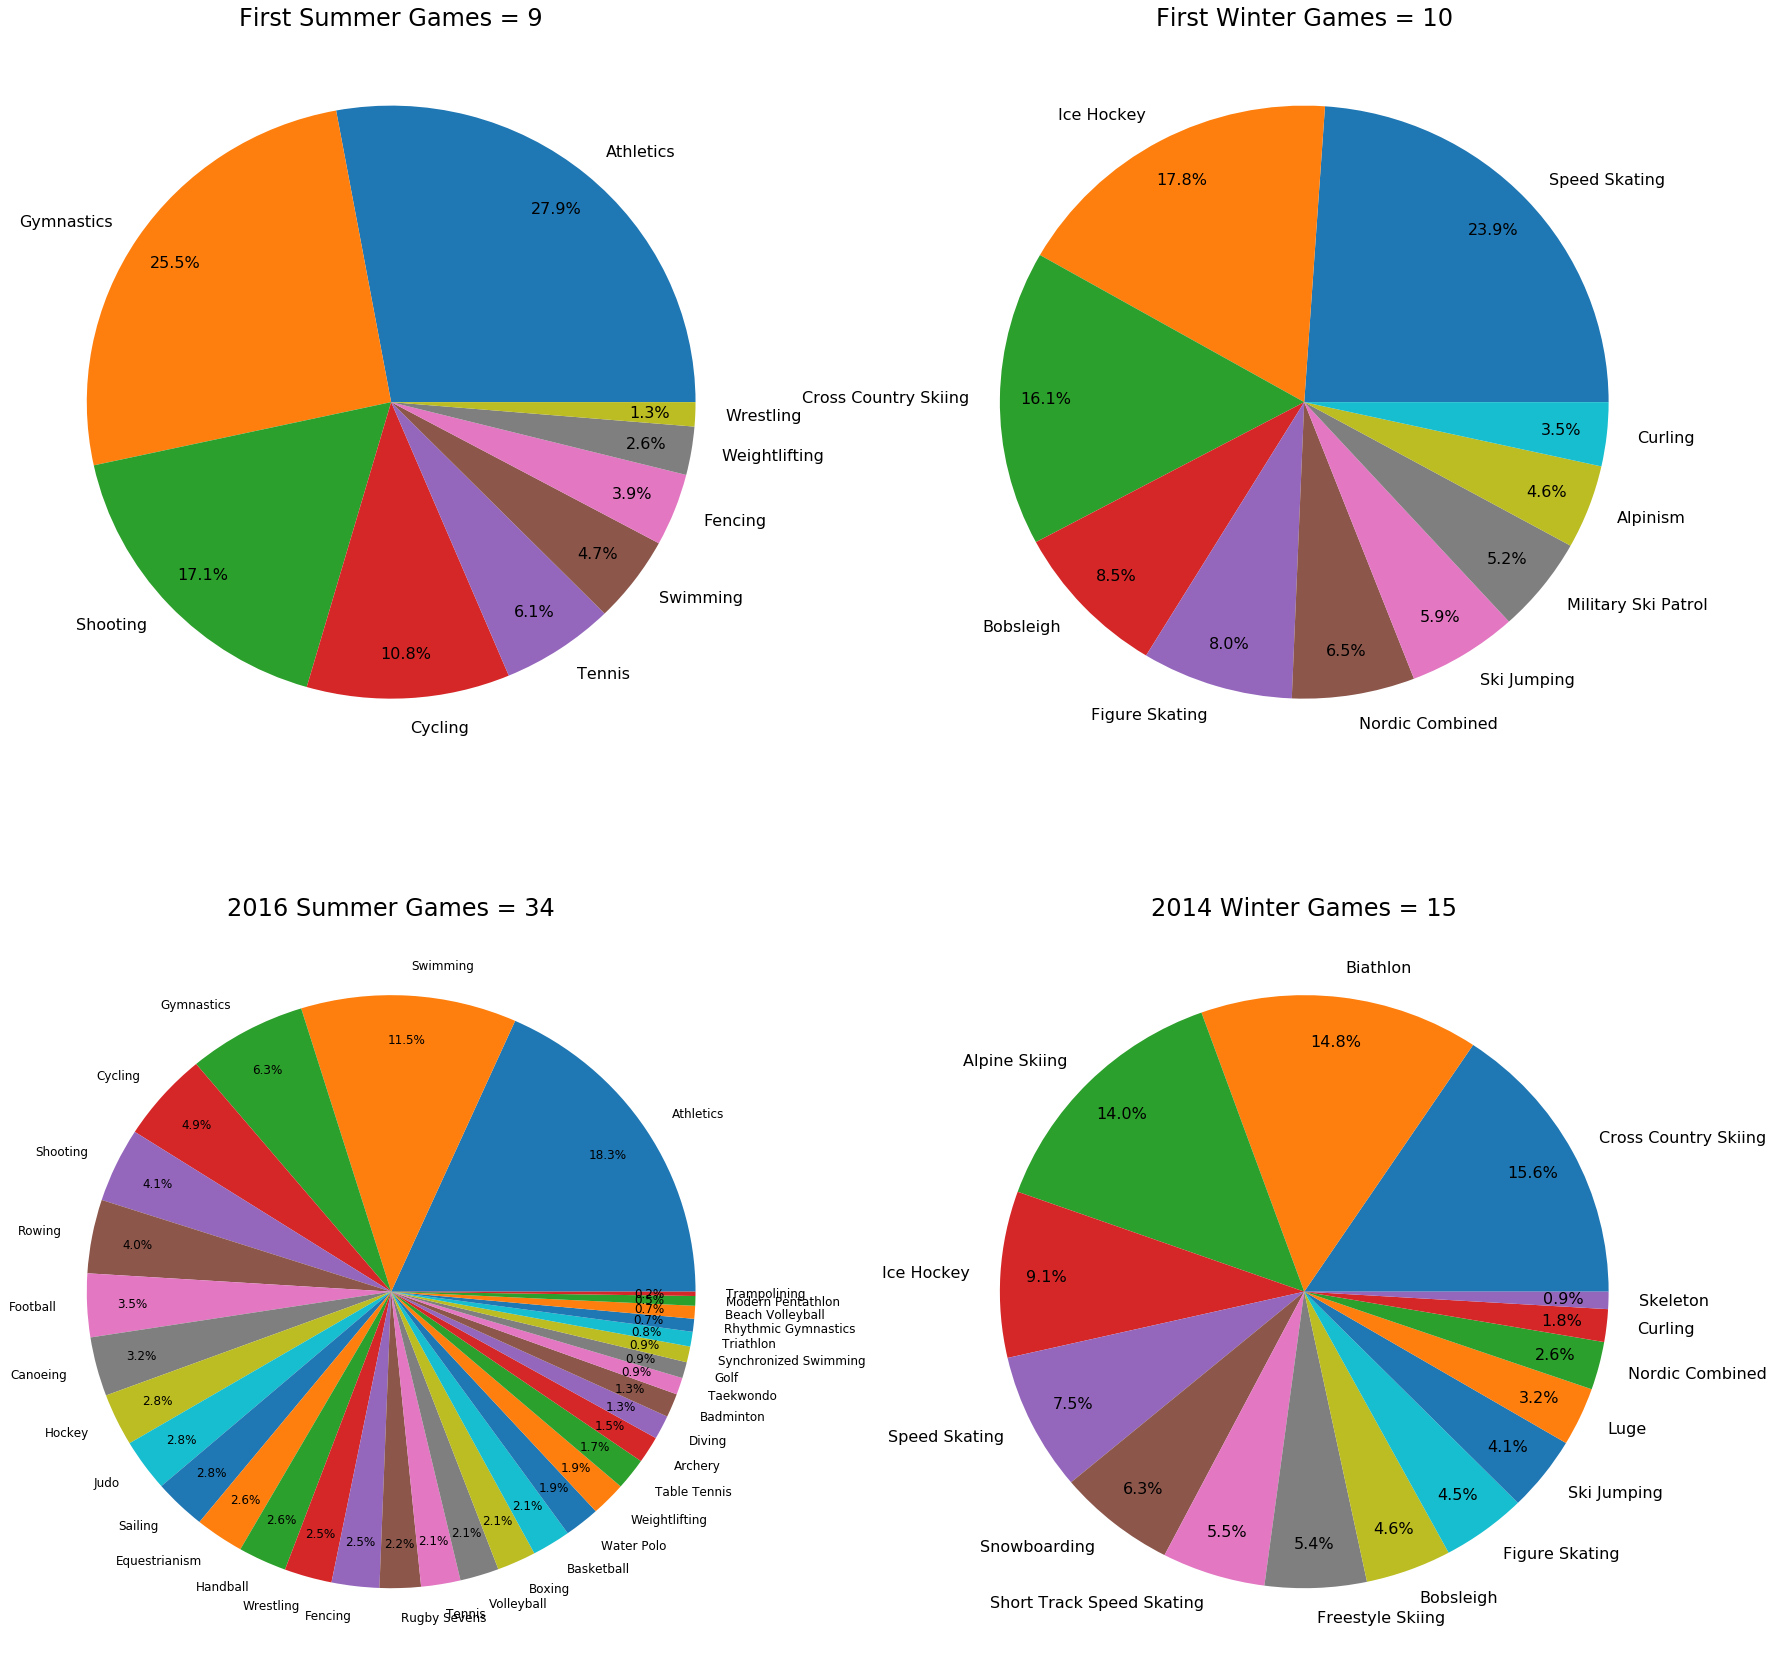

In [6]:
# show pie charts for sports in first year vs most recent year for winter and summer
# first year (summer = 1896)(winter = 1924)

df_by_year_season = df.groupby(['Year', 'Season']).count()
#print(df_by_year_season.head(10))
#print(df_by_year_season.tail(10))
first_summer = df[(df['Season'] == 'Summer') & (df['Year'] == 1896)]
first_winter = df[(df['Season'] == 'Winter') & (df['Year'] == 1924)]

first_summer_counts = first_summer.Sport.value_counts()
first_winter_counts = first_winter.Sport.value_counts()
#print(first_summer_counts)

summer1label = first_summer_counts.index.tolist()
winter1label = first_winter_counts.index.tolist()

#sports for most recent olympics (summer=2016)(winter=2014)
summer2016 = df[(df['Season'] == 'Summer') & (df['Year'] == 2016)]
summer2016_counts = summer2016.Sport.value_counts()
summer2016label = summer2016_counts.index.tolist()

winter2014 = df[(df['Season'] == 'Winter') & (df['Year'] == 2014)]
winter2014_counts = winter2014.Sport.value_counts()
winter2014label = winter2014_counts.index.tolist()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 30))
ax1.set_title('First Summer Games = 9', fontsize='24')
ax1.pie(first_summer_counts, labels=summer1label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})
ax2.set_title('First Winter Games = 10', fontsize='24')
ax2.pie(first_winter_counts, labels=winter1label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})
ax3.set_title('2016 Summer Games = 34', fontsize='24')
ax3.pie(summer2016_counts, labels=summer2016label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 12})
ax4.set_title('2014 Winter Games = 15', fontsize='24')
ax4.pie(winter2014_counts, labels=winter2014label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})

plt.show()


These pie charts represent the number of sports for the first Olympics and for the most recent games separated by season.  The percentages are based on the number of athletes that competed in each event.  The Summer games have seen a drastic increase in the number of sports competed in, which has more than tripled from 9 to 34.  The Winter games stayed much more consistant, only increasing from 10 to 15 games.  The table below contains a list of sports for each of the plots.

In [7]:
#create a data table grouped by year and sport for the first and present games
#print(summer1label)
#print(winter1label)
#print(summer2016label)
#print(winter2014label)

my_dict=dict({'First Summer Games':summer1label, 'First Winter Games':winter1label, '2016 Summer Games':summer2016label, '2014 Winter Games':winter2014label})
pie_table = pd.DataFrame.from_dict(my_dict, orient='index')

print(pie_table.transpose()[['First Winter Games', '2014 Winter Games', 'First Summer Games', '2016 Summer Games']])

      First Winter Games          2014 Winter Games First Summer Games  \
0          Speed Skating       Cross Country Skiing          Athletics   
1             Ice Hockey                   Biathlon         Gymnastics   
2   Cross Country Skiing              Alpine Skiing           Shooting   
3              Bobsleigh                 Ice Hockey            Cycling   
4         Figure Skating              Speed Skating             Tennis   
5        Nordic Combined               Snowboarding           Swimming   
6            Ski Jumping  Short Track Speed Skating            Fencing   
7    Military Ski Patrol           Freestyle Skiing      Weightlifting   
8               Alpinism                  Bobsleigh          Wrestling   
9                Curling             Figure Skating               None   
10                  None                Ski Jumping               None   
11                  None                       Luge               None   
12                  None            No

Lets take another look at the medals won in this dataset by grabbing the top 10 most winniest countries.  Since both Russia (RUS) and the Soviet Union (URS) show up in the top 10 we must make sure that we combine them to account for all the medals won from the geographic location of Russia.

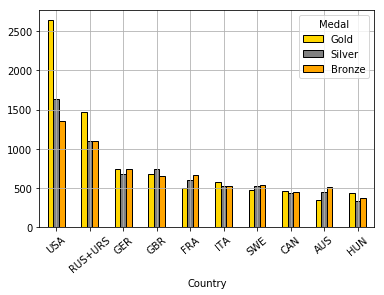

In [8]:
#rus = df[df['NOC']=='RUS']
#print(np.sort(rus['Year'].unique()))
#urs = df[df['NOC']=='URS']
#print(np.sort(urs['Year'].unique()))

#grab top 10 winningest countries
team = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)
team = team.reset_index()
team.columns = ['Country', 'Medal Counts']
combo = team.set_index('Country').transpose()
combo['RUS+URS'] = combo['RUS'] + combo['URS']
combo = combo.drop(columns=['RUS', 'URS'])
combo = combo.transpose().sort_values(by='Medal Counts', ascending=False)
combo = combo.reset_index()
top_medals = combo.iloc[0:10]
#print(top_medals)

#print(top_medals.nunique())
#label = top_medals.Country
#top_medals.plot(x='Country', kind='bar', rot=40)
#plt.show()

#separate top 10 countries by medal
counted = df.pivot_table(index='NOC', columns='Medal', values='Event', aggfunc='count')
counted['Totals'] = counted.sum(axis='columns')
#print(counted)

combo1 = counted.transpose()
combo1['RUS+URS'] = combo1['URS'] + combo1['RUS']
combo1 = combo1.drop(columns=['RUS', 'URS'])
combo1 = combo1.transpose().sort_values('Totals', ascending=False)
#print(combo1)

top_counted = combo1.iloc[0:10]
top_counted = top_counted[['Gold', 'Silver', 'Bronze']]
#print(top_counted)

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10), sharey=True)
#top_medals.plot(x='Country', kind='bar', rot=40, ax=ax1, grid=True)
top_counted.plot(kind='bar', rot=40, grid=True, color=['gold', 'grey', 'orange'],  edgecolor='black')
plt.xlabel('Country')
plt.show()


The USA has clearly dominated the medal count by country throughout the course of the Olympics.  The second closest country is Russia (including the Soviet Union).  Lets dive a little deeper into the USA vs Russia in the eyes of the Olympics.

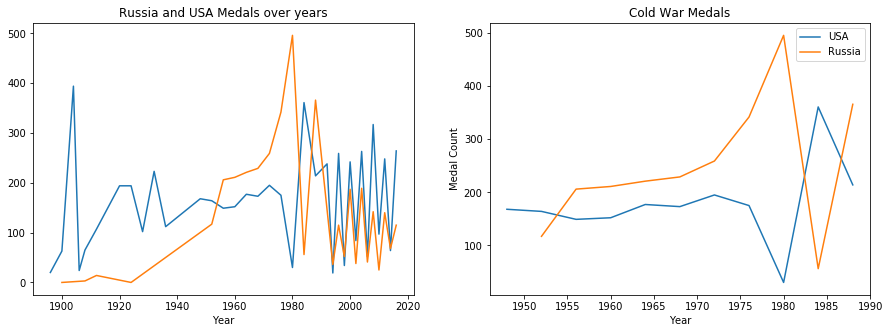

In [9]:
#grab USA medals alone
USA_grouped = df.loc[df.NOC == 'USA'].groupby('Year').count()
#print(USA_grouped.Medal.sum())

#grab RUS medals alone
RUS_grouped = df.loc[(df.NOC == 'RUS') | (df.NOC == 'URS')].groupby('Year').count()
RUS = df.loc[df.NOC == 'RUS'].groupby('Year').count()
URS = df.loc[df.NOC == 'URS'].groupby('Year').count()
#print(RUS_grouped.Medal.sum())

#check to make sure RUS was RUS the whole time and nothing else
rus_check = df['NOC'].value_counts()
#print(rus_check)
#print(RUS)
#print(URS)


#grab the cold war years alone (1947 - 1991)
USA_cold = USA_grouped.loc[1947:1991]
RUS_cold = RUS_grouped.loc[1947:1991]
#print(USA_cold)


#plot USA and RUS medals over time
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 5))
USA_grouped.Medal.plot(x='Year', kind='line', ax=ax)
RUS_grouped.Medal.plot(x='Year', kind='line', title='Russia and USA Medals over years', ax=ax)

USA_cold.Medal.plot(x='Year', kind='line', ax=ax1)
RUS_cold.Medal.plot(x='Year', kind='line', ax=ax1, title='Cold War Medals')

plt.ylabel('Medal Count')
plt.legend(["USA", 'Russia'])

plt.show()

What is interesting to note with these plots is that the USA was consistently beat by Russia (Soviet Union) in almost every games during the Cold War.  Outside of this time frame, the USA won more medals than Russia. 

In [26]:
#which athlete won the most medals?

athlete_medals = df.groupby('Name')['Medal'].count().sort_values(ascending=False)
athlete_medals_max = df.groupby('Name')['Medal'].count().max()
athlete_medals_name = athlete_medals[athlete_medals==28]
years_of_comp = df[df['Name']==athlete_medals_name.index[0]]
years_of_comp = years_of_comp[['Age', 'Year', 'Medal', 'Event']]
medal_breakdown_MP = years_of_comp.pivot_table(index='Year', columns='Medal', values='Event', aggfunc='count')
medal_breakdown_MP = medal_breakdown_MP[['Bronze', 'Silver', 'Gold']]
medal_breakdown_MP['Total'] = medal_breakdown_MP.sum(axis=1)

#print(athlete_medals.head())
#print(type(athlete_medals_name))
#print(athlete_medals_name.index[0])
#print(years_of_comp)
print(medal_breakdown_MP)

print('The olympian who won the most medals is {}.\nThe number of medals won is:  {}'.format(athlete_medals_name.index[0], athlete_medals_max))
print('{} won {} Gold medals, {} Silver medals, and {} Bronze medals'.format(athlete_medals_name.index[0], int(medal_breakdown_MP['Gold'].sum()), int(medal_breakdown_MP['Silver'].sum()), int(medal_breakdown_MP['Bronze'].sum())))

#find top female medal winner
females = df[df['Sex'] == 'F']
female_medals = females.groupby('Name')['Medal'].count().sort_values(ascending=False)
female_medals_max = females.groupby('Name')['Medal'].count().max()
female_medals_name = female_medals[female_medals==18]
female_years_of_comp = df[df['Name']==female_medals_name.index[0]]
female_years_of_comp = female_years_of_comp[['Age', 'Year', 'Medal', 'Event']]
medal_breakdown_LSL = female_years_of_comp.pivot_table(index='Year', columns='Medal', values='Event', aggfunc='count')
medal_breakdown_LSL = medal_breakdown_LSL[['Bronze', 'Silver', 'Gold']]
medal_breakdown_LSL['Total'] = medal_breakdown_LSL.sum(axis=1)

#print(female_medals.head())
#print(type(female_medals_name))
#print(female_medals_name.index[0])
#print(female_years_of_comp)
print(medal_breakdown_LSL)

print('The female olympian who won the most medals is {}.\nThe number of medals won is:  {}'.format(female_medals_name.index[0], female_medals_max))
print('{} won {} Gold medals, {} Silver medals, and {} Bronze medals'.format(female_medals_name.index[0], int(medal_breakdown_LSL['Gold'].sum()), int(medal_breakdown_LSL['Silver'].sum()), int(medal_breakdown_LSL['Bronze'].sum())))


Medal  Bronze  Silver  Gold  Total
Year                              
2004      2.0     NaN   6.0    8.0
2008      NaN     NaN   8.0    8.0
2012      NaN     2.0   4.0    6.0
2016      NaN     1.0   5.0    6.0
The olympian who won the most medals is Michael Fred Phelps, II.
The number of medals won is:  28
Michael Fred Phelps, II won 23 Gold medals, 3 Silver medals, and 2 Bronze medals
Medal  Bronze  Silver  Gold  Total
Year                              
1956        1       1     4      6
1960        1       2     3      6
1964        2       2     2      6
The female olympian who won the most medals is Larysa Semenivna Latynina (Diriy-).
The number of medals won is:  18
Larysa Semenivna Latynina (Diriy-) won 9 Gold medals, 5 Silver medals, and 4 Bronze medals


We have 

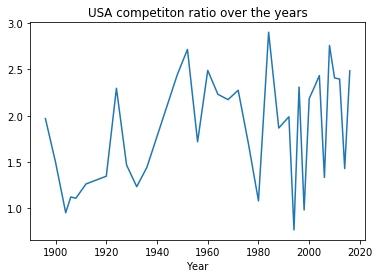

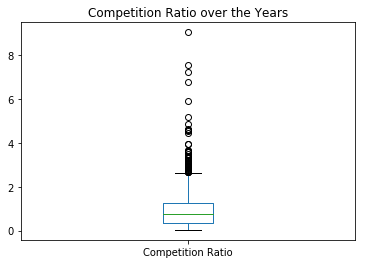

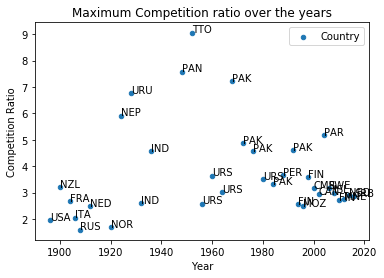

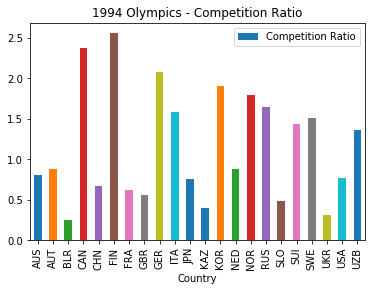

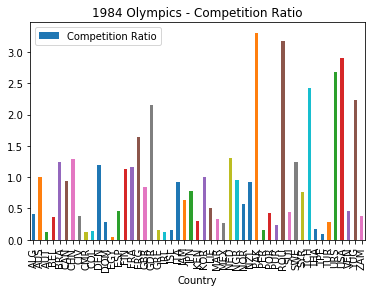

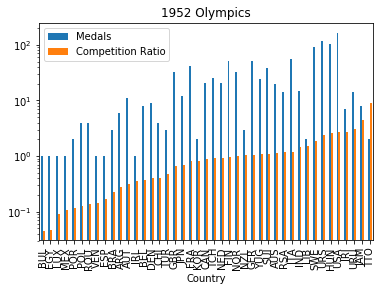

In [10]:
#sort by year and NOC
athletes_per_year = df.groupby('Year')[['Name', 'Medal']].count()
athletes_per_year.columns=['Total Athletes', 'Total Medals']
#print(athletes_per_year)
grouped_NOC = df.groupby(['Year','NOC'])['Name', 'Medal'].count()
test = pd.DataFrame(grouped_NOC).reset_index()
merge1 = pd.merge(athletes_per_year, test[['Year', 'NOC', 'Medal', 'Name']], how='outer', on='Year')
#print(merge1)

merge1.columns = ['Year', 'Total Athletes', 'Total Medals', 'Country', 'Medals', 'Athletes']

# normalized medals is the number of medals won per country for each year divided by the total number of medals won for that year
merge1['Normalized Medals'] = merge1.Medals/merge1['Total Medals']

# normalized athletes is number of athletes per country normalized by total number of athletes competeting for that year
merge1['Normalized Athletes'] = merge1.Athletes/merge1['Total Athletes']

# this is a comparision of the normalized medals to normalized athletes per year
merge1['Competition Ratio'] = merge1['Normalized Medals']/merge1['Normalized Athletes']
merge1['Ratio'] = merge1['Medals']/merge1['Athletes']
#print(merge1)

merge1a = merge1.drop(columns=['Total Athletes', 'Total Medals']).set_index(['Year', 'Country'])
#merge1a = merge1.sort_index()

#drop zeros from competition ratio
drop_zero = merge1a['Medals']==0
merge1a = merge1a.drop(merge1a.index[drop_zero])
#print(merge1a)
#print(merge1a.head(20))
#print(merge1a.loc[1896])
#print(merge1a.loc[[1896], ['Normalized Medals']].sum())
#print(merge1a.loc[[1896], ['Normalized Athletes']].sum())


# plot competition ratio over time for USA
comp_usa = merge1[merge1['Country'] == 'USA']
comp_usa = comp_usa.set_index('Year')
comp_ratio_usa = comp_usa['Competition Ratio']
comp_ratio_usa.plot(kind='line', title='USA competiton ratio over the years')

#Maximum competition ratio for each year
# *** want to create a list of Country names for each max value to display on plot ***
tot_comp_ratio = merge1[['Year', 'Competition Ratio']]
max_comp_ratio = tot_comp_ratio.groupby('Year').max()
max_comp_ratio = pd.DataFrame(max_comp_ratio).reset_index()
#print(merge1a.loc[1952])

#max_comp_ratio.plot(x='Year', y='Competition Ratio', kind='scatter', title='Maximum Competition ratio over the years')
plt.show()


#start with merge1a and unstack and calcualte max on competition ratio to find associated Country
max_country_comp = pd.DataFrame(merge1a).reset_index()
list_of_max_values = max_country_comp.groupby('Year')['Competition Ratio'].max().tolist()

max_country_comp.plot(kind='box', x='Year', y='Competition Ratio', title="Competition Ratio over the Years")
plt.show()

max_country_comp = max_country_comp[['Competition Ratio', 'Country', 'Year']]
max_country_comp = max_country_comp.set_index('Year')
max_country_comp = max_country_comp.groupby(['Year', 'Competition Ratio'])['Country'].max()
max_country_comp = max_country_comp.loc[:,list_of_max_values]

country_names = pd.DataFrame(max_country_comp).reset_index()
list_of_max_names = country_names['Country'].tolist()
#print(max_country_comp)
#print(list_of_max_values)
#print(len(list_of_max_values))
#print(list_of_countries_max)
#print(type(country_names))
#print(country_names)
#print(list_of_max_names)

#fig = plt.figure(figsize=(10,10))
country_names.plot(kind='scatter', x='Year', y='Competition Ratio', label='Country', title='Maximum Competition ratio over the years')
#list of max names = list of Country names associated with max competition ratio -> use as label for scatter plot
#create list of years -> years
years = country_names.Year.tolist()
#print(years)
#create list of competition ratio -> comp_ratio
comp_ratio = country_names['Competition Ratio'].tolist()
#print(comp_ratio)

for label, x, y in zip(list_of_max_names, years, comp_ratio):
    #print(label)
    #print(x)
    #print(y)
    plt.annotate(label, xy=(x, y))
plt.show()


#print(comp_ratio_usa.idxmin())
#print(comp_ratio_usa.idxmax())
#print(merge1a.loc[comp_ratio_usa.idxmin()])
#print(merge1a.loc[comp_ratio_usa.idxmax()])

min_comp = merge1a.loc[[comp_ratio_usa.idxmin()],['Competition Ratio']]
max_comp = merge1a.loc[[comp_ratio_usa.idxmax()],['Competition Ratio']]
min_comp = pd.DataFrame(min_comp).reset_index()
max_comp = pd.DataFrame(max_comp).reset_index()
#print(min_comp)
min_comp.plot(kind='bar', x='Country', y='Competition Ratio', title='1994 Olympics - Competition Ratio')
plt.show()
plt.clf()
plt.close()

#fig = plt.figure(figsize=(10,10))
max_comp.plot(kind='bar', x='Country', y='Competition Ratio', title='1984 Olympics - Competition Ratio')
plt.show()

#lets take a look at the 1952 olympics
df1952 = merge1a.loc[1952]
#print(df1952[['Medals', 'Athletes', 'Competition Ratio']])
#print(merge1a)
df1952_medals_comp_ratio = df1952[['Medals', 'Competition Ratio']]
df1952_medals_comp_ratio = df1952_medals_comp_ratio[df1952_medals_comp_ratio.Medals != 0].sort_values("Competition Ratio")
df1952_medals_comp_ratio.plot(kind='bar', logy=True, title='1952 Olympics')
plt.show()

These plots are based on a value created for visualition called the competition ratio.  The competition ratio is the ratio of "normalized" medals to "normalized" athletes.  These "normalized" values are found by dividing the number of medals and atheletes by the total number of medals and athletes per year.  This competition ratio can be considered a measure of the rank for each country for each year.  It is a numeric representation of the number medals won divided by number of athletes per country both normalized by their totals per year.  The last plot shows the total medals vs the competition ratio for the countries competing in the 1952 olympic games.  This was selected because it contained the maximum competition ratio value in the set.  This occurred for TTO (Trinidad and Tobago) in 1952 when they sent 2 athletes and they both won medals.  More accurate normalization will follow...

will attempt to normalize using the max-min normalization:

yi = (xi -xmin)/(xmax - xmin)

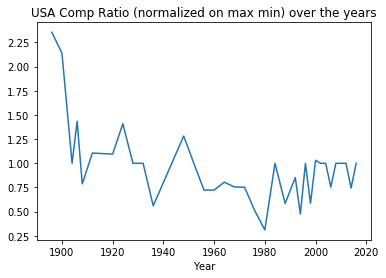

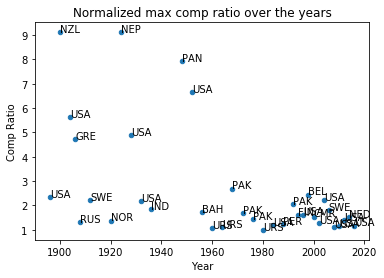

In [12]:
# Lets look at the Athletes, number of medals, and countries grouped by year normalized on min max
# of athletes and medals per year

#print(df.head())
year = df.groupby(['Year', 'NOC']).agg({'Name':'count', 'Medal':'count'})

yearlist = df['Year'].sort_values().unique()
#print(yearlist)

min_athlete = []
max_athlete = []
min_medal = []
max_medal = []

for yr in yearlist:
    min_athlete.append(year.loc[yr].min()[0])
    max_athlete.append(year.loc[yr].max()[0])
    min_medal.append(year.loc[yr].min()[1])
    max_medal.append(year.loc[yr].max()[1])

min_athlete = np.array(min_athlete)
max_athlete = np.array(max_athlete)
min_medal = np.array(min_medal)
max_medal = np.array(max_medal)
Athlete_Delta = max_athlete - min_athlete
Medal_Delta = max_medal - min_medal

year = year.reset_index()
year = year.set_index('Year')
temp = zip(min_athlete, Athlete_Delta, min_medal, Medal_Delta)
temp1 = zip(yearlist, temp)
Delta = dict(temp1)
#print(Delta)
df_delta = pd.DataFrame(Delta)
df_delta = df_delta.transpose()
df_delta = df_delta.reset_index()
df_delta.columns = ['Year','Athlete Min','Athlete Delta', 'Medal Min', 'Medal Delta']
df_delta = df_delta.set_index('Year')
#print(df_delta)
#print(year)

#print(df.groupby('Year')['Medal'].count())

norm_df = pd.merge(year, df_delta, left_on='Year' , right_on='Year', how='outer')
norm_df = norm_df.reset_index()
norm_df.columns = ['Year', 'Country', 'Athlete', 'Medals', 'Athlete Min', 'Athlete Delta', 'Medal Min', 'Medal Delta']
norm_df['Normalized Athletes'] = (norm_df['Athlete'] - norm_df['Athlete Min'])/norm_df['Athlete Delta']
norm_df['Normalized Medals'] = (norm_df['Medals'] - norm_df['Medal Min'])/norm_df['Medal Delta']
norm_df['Comp Ratio'] = norm_df['Normalized Medals']/norm_df['Normalized Athletes']
norm_df = norm_df[['Year', 'Country', 'Athlete', 'Medals', 'Normalized Athletes', 'Normalized Medals', 'Comp Ratio']]
norm_df = norm_df.set_index(['Year', 'Country'])

#print(norm_df.head())

# we need to fix the inf and NaN values in the Comp Ratio column
mask = norm_df['Comp Ratio'] != np.inf
norm_df.loc[~mask, 'Comp Ratio'] = norm_df.loc[mask, 'Comp Ratio'].max()
norm_df = norm_df.fillna(0)

#print(norm_df)

# lets look at the same plots as above using the max min normalized data
# USA comp ratio over time

USA = norm_df.loc[(slice(None), 'USA'),:]
USA = USA.reset_index()
USA = USA.set_index('Year')
USA = USA['Comp Ratio']
USA.plot(kind='line', title='USA Comp Ratio (normalized on max min) over the years')
plt.show()

#grab list of countries by max comp ratio and list of x and y coordinates to label on scatter plot
countries = norm_df.reset_index()
countries_list = countries.groupby(['Year', 'Comp Ratio'])['Country'].max()

max_comp_ratio_list = norm_df.groupby('Year').max()
max_comp_ratio_list = max_comp_ratio_list['Comp Ratio'].tolist()

countries_list = countries_list.loc[:, max_comp_ratio_list]
countries_list = pd.DataFrame(countries_list).reset_index()
countries_list = countries_list.groupby('Year').max()
countries_list = countries_list['Country'].tolist()
#print(countries_list)


# lets plot the max comp ratio vs time
max_comp = norm_df.groupby('Year').max()
#print(max_comp)
max_comp = max_comp.reset_index()
max_comp.plot(kind='scatter', x='Year', y='Comp Ratio', title='Normalized max comp ratio over the years')

year = max_comp_ratio['Year'].tolist()
for label, x, y in zip(countries_list, year, max_comp_ratio_list):
    plt.annotate(label, xy = (x, y))
plt.show()
